# Nagłówek 1-6


**Pogrubiony tekst**
*Tekst kursywą*
~~Przekreślony tekst~~
***pogrubiona kursywa***

> To jest cytat.
>> Cytat zagnieżdżony.

| Kolumna 1 | Kolumna 2 | Kolumna 3 |
|-----------|-----------|-----------|
| Wartość 1 | Wartość 2 | Wartość 3 |
| Wartość 4 | Wartość 5 | Wartość 6 |




# Wstępne przetwarzanie danych

### Wczytanie danych i informacje o nich

In [69]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
data = pd.read_csv('data/HCV-Egy-Data.csv')
    # 1385 rows x 29 columns
    # RBC, PLAT, AL4 - format jako float64
    # reszta jako int64

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

### Usuniecie duplikatów
*brak duplikatów*

In [71]:
num_duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f'Liczba usuniętych duplikatów: {num_duplicates}')
print(f'Po usunięciu duplikatów: {data.shape}')

Liczba usuniętych duplikatów: 0
Po usunięciu duplikatów: (1385, 29)


### Sprawdzenie brakującyh wartości
*brak brakujacych wartosci*

In [72]:
print(data.isnull().sum())

Age                                0
Gender                             0
BMI                                0
Fever                              0
Nausea/Vomting                     0
Headache                           0
Diarrhea                           0
Fatigue & generalized bone ache    0
Jaundice                           0
Epigastric pain                    0
WBC                                0
RBC                                0
HGB                                0
Plat                               0
AST 1                              0
ALT 1                              0
ALT4                               0
ALT 12                             0
ALT 24                             0
ALT 36                             0
ALT 48                             0
ALT after 24 w                     0
RNA Base                           0
RNA 4                              0
RNA 12                             0
RNA EOT                            0
RNA EF                             0
B

### Obsługa outlinerow

#### Sprawdzenie czy dane są poprawnie odczytywane
##### *( ! ) nelzelao usunac biale znaki znazwykolumn*

In [73]:
continuous_features = ['Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']

In [74]:
# Sprawdzenie, które kolumny istnieją w zbiorze danych
existing_features = [feature for feature in continuous_features if feature in data.columns]
missing_features = [feature for feature in continuous_features if feature not in data.columns]

In [75]:
if missing_features:
    print(f"Ostrzeżenie: Następujące kolumny nie zostały znalezione w zbiorze danych i zostaną pominięte: {missing_features}")

#### Identyfiakcja outlinerów za pomocą wykresów pudełkowych
*brak outlinerow w kilku ciaglych a w rescie usuniecie w dwóch kolumnach*

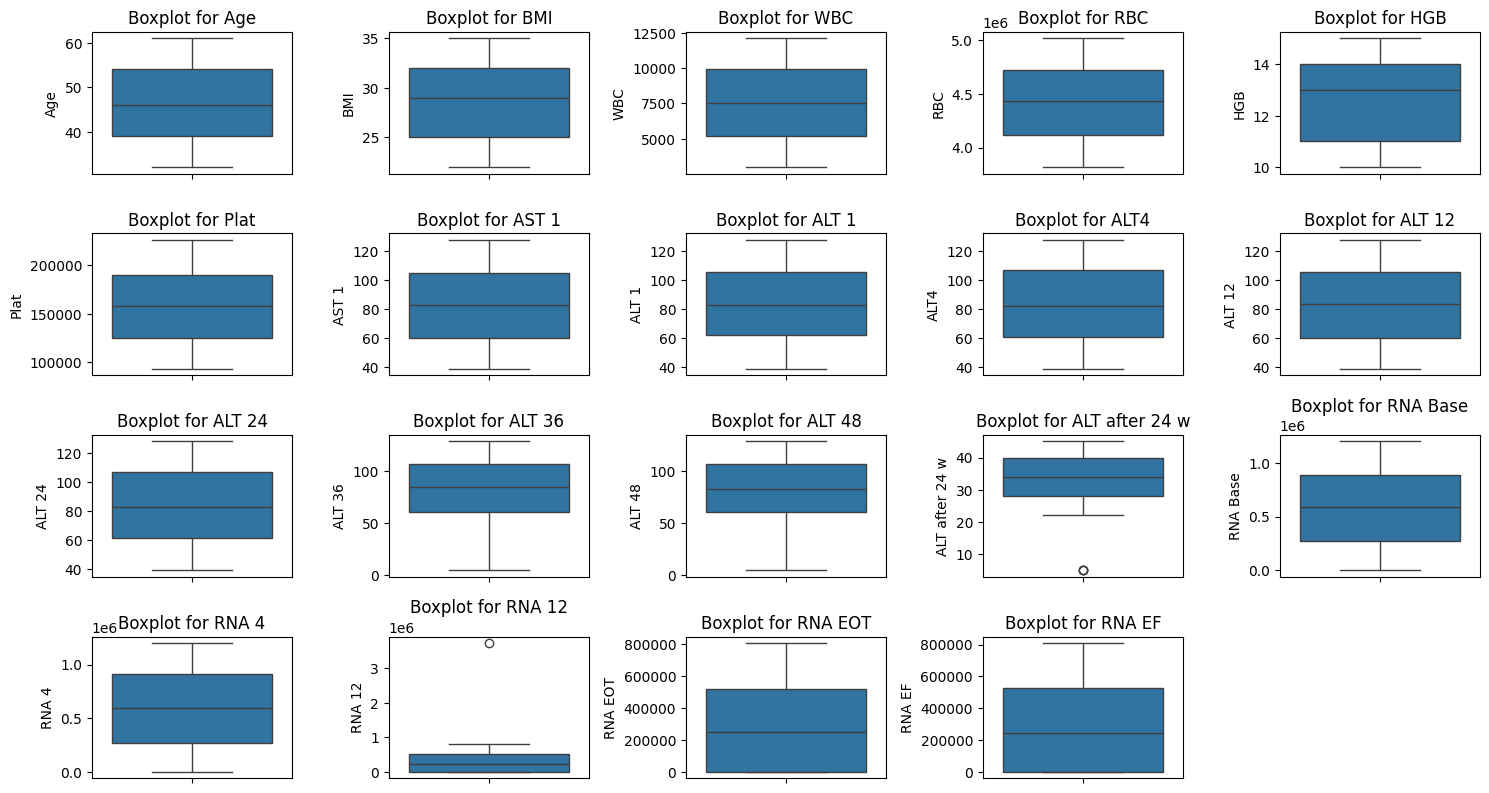

In [76]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

In [77]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

##### Identyfikacja outlinerów dla pozostałych cech ciągłych

Sprawdzanie outlierów dla pozostałych cech ciągłych: ['ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']


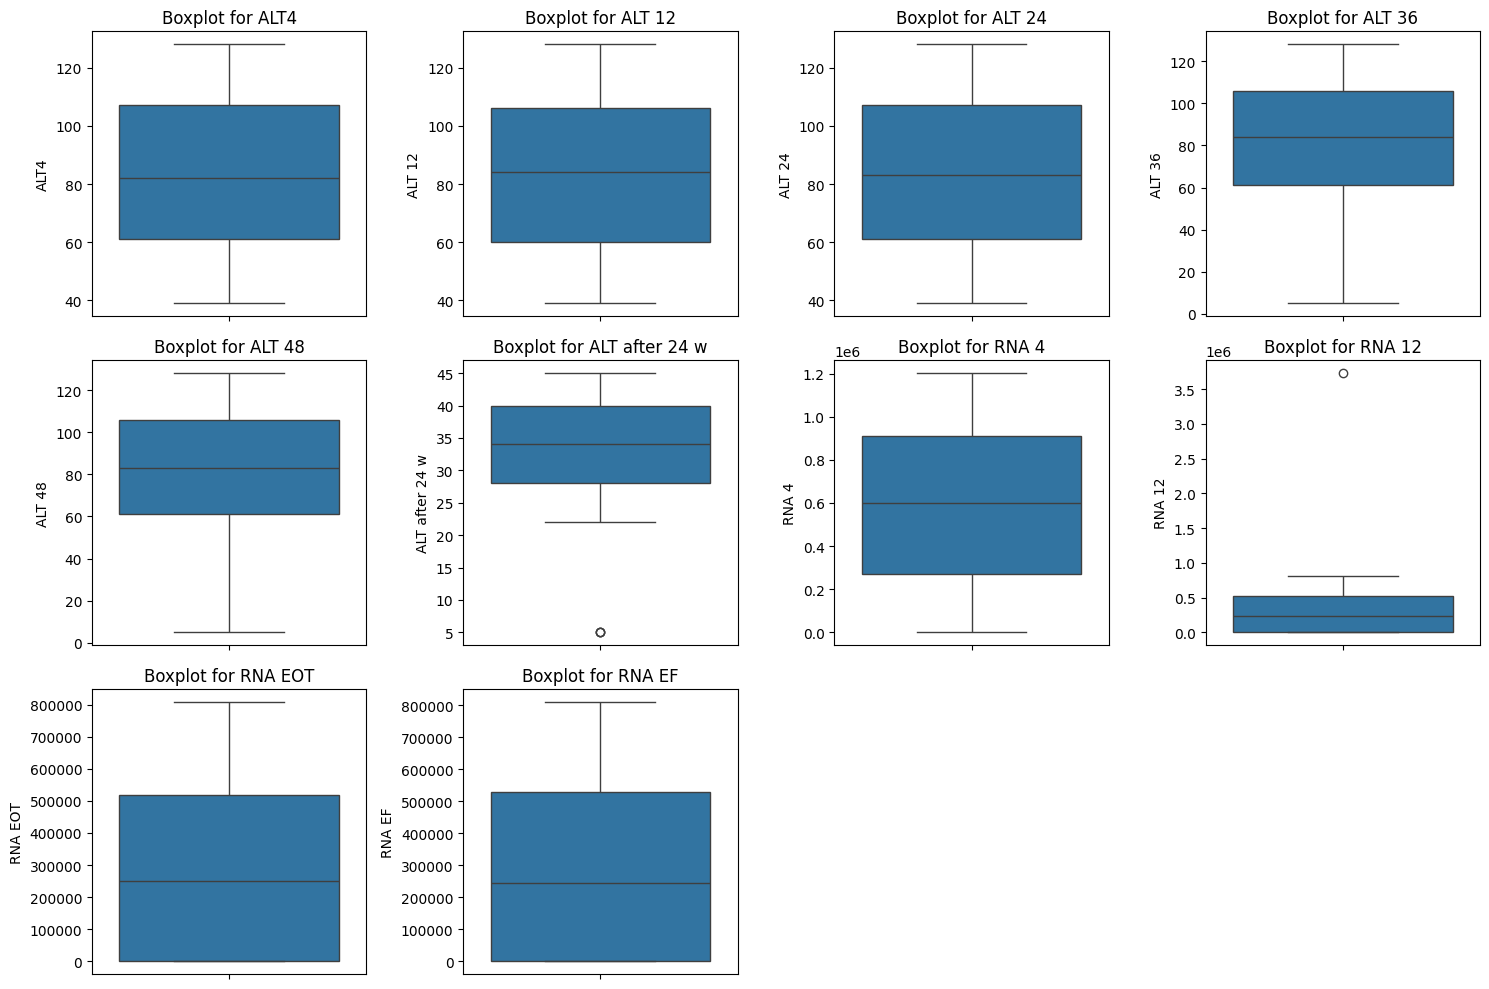

In [78]:
remaining_features = ['ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA 4','RNA 12','RNA EOT','RNA EF']

if remaining_features:
    print(f"Sprawdzanie outlierów dla pozostałych cech ciągłych: {remaining_features}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(remaining_features, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

##### Usuwanie outlierów za pomocą metody IQR (Interquartile Range) dla 'ALT 24 after w' oraz 'RNA 12'
###### 4 wiersze suunieta

In [79]:
features_to_remove_outliers = ['ALT after 24 w', 'RNA 12']
for feature in features_to_remove_outliers:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrowanie danych, usuwanie outlierów
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

print(f'Po usunięciu outlierów: {data.shape}')


Po usunięciu outlierów: (1381, 29)


Sprawdzanie czy outlierów zostały usunięte: ['ALT after 24 w', 'RNA 12']


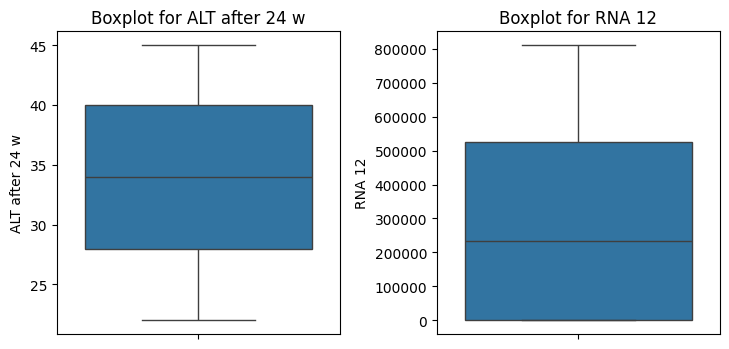

In [80]:
if features_to_remove_outliers:
    print(f"Sprawdzanie czy outlierów zostały usunięte: {features_to_remove_outliers}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features_to_remove_outliers, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

### Standaryzacja

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# Przed standaryzacją - podgląd danych
print("Dane przed standaryzacją:")
print(data[continuous_features].describe())

Dane przed standaryzacją:
               Age          BMI           WBC           RBC          HGB  \
count  1381.000000  1381.000000   1381.000000  1.381000e+03  1381.000000   
mean     46.304852    28.594497   7538.801593  4.422279e+06    12.590152   
std       8.771688     4.073146   2668.512414  3.465698e+05     1.713549   
min      32.000000    22.000000   2991.000000  3.816422e+06    10.000000   
25%      39.000000    25.000000   5220.000000  4.121374e+06    11.000000   
50%      46.000000    29.000000   7514.000000  4.438465e+06    13.000000   
75%      54.000000    32.000000   9941.000000  4.724387e+06    14.000000   
max      61.000000    35.000000  12101.000000  5.018451e+06    15.000000   

                Plat        AST 1        ALT 1         ALT4       ALT 12  \
count    1381.000000  1381.000000  1381.000000  1381.000000  1381.000000   
mean   158347.194786    82.758146    83.923968    83.435916    83.496741   
std     38816.791430    25.988783    25.937453    26.548774  

In [84]:
# Standaryzacja zmiennych ciągłych
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [85]:
# Po standaryzacji - podgląd danych
print("Dane po standaryzacji:")
print(data[existing_features].describe())

Dane po standaryzacji:
                Age           BMI           WBC           RBC           HGB  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03   
mean  -2.723704e-16  3.936026e-16  9.003981e-17 -1.330017e-15 -3.820261e-16   
std    1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00   
min   -1.631389e+00 -1.619604e+00 -1.704863e+00 -1.748787e+00 -1.512119e+00   
25%   -8.330777e-01 -8.828062e-01 -8.692639e-01 -8.685528e-01 -9.283236e-01   
50%   -3.476663e-02  9.959135e-02 -9.297531e-03  4.671999e-02  2.392674e-01   
75%    8.775889e-01  8.363895e-01  9.005274e-01  8.720245e-01  8.230628e-01   
max    1.675900e+00  1.573188e+00  1.710260e+00  1.720831e+00  1.406858e+00   

               Plat         AST 1         ALT 1          ALT4        ALT 12  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03   
mean  -1.106203e-16  1.389186e-16  2.366761e-16  1.414911e-16 -2.624017e-16   
std    1.000362e+00  1.00036

In [86]:
for feature in existing_features:
    print(f"{feature} > Mean: {data[feature].mean()}, Std: {data[feature].std()}")
    


Age > Mean: -2.723704277646655e-16, Std: 1.0003622532268794
BMI > Mean: 3.93602601633944e-16, Std: 1.0003622532268797
WBC > Mean: 9.003981083129438e-17, Std: 1.0003622532268794
RBC > Mean: -1.3300166342794054e-15, Std: 1.0003622532268794
HGB > Mean: -3.820260545270633e-16, Std: 1.0003622532268794
Plat > Mean: -1.1062033902130452e-16, Std: 1.0003622532268794
AST 1 > Mean: 1.3891856528256846e-16, Std: 1.0003622532268794
ALT 1 > Mean: 2.3667607418511664e-16, Std: 1.0003622532268794
ALT4 > Mean: 1.4149113130631974e-16, Std: 1.0003622532268794
ALT 12 > Mean: -2.624017344226293e-16, Std: 1.0003622532268794
ALT 24 > Mean: 8.360839577191621e-17, Std: 1.0003622532268794
ALT 36 > Mean: 2.804096965888882e-16, Std: 1.0003622532268794
ALT 48 > Mean: -2.3153094213761412e-17, Std: 1.0003622532268794
ALT after 24 w > Mean: -2.3667607418511664e-16, Std: 1.0003622532268797
RNA Base > Mean: -9.775750890254817e-17, Std: 1.0003622532268794
RNA 4 > Mean: 1.4920882937757354e-16, Std: 1.0003622532268797
RNA 1

### Podsumowanie i zapis oczyszczonych danych

Zbiór danych jest zbalansowany.
Rozkład próbek dla kolumny `Baselinehistological staging`:
- **Klasa 4**: 26.07%
- **Klasa 3**: 25.71%
- **Klasa 1**: 24.26%
- **Klasa 2**: 23.97%


In [88]:
# Podsumowanie po czyszczeniu danych
print(data.info())
print(data.describe())

# Zapisz oczyszczony zbior danych do nowego pliku
data.to_csv('cleaned_database.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 1 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1381 non-null   float64
 1   Gender                           1381 non-null   int64  
 2   BMI                              1381 non-null   float64
 3   Fever                            1381 non-null   int64  
 4   Nausea/Vomting                   1381 non-null   int64  
 5   Headache                         1381 non-null   int64  
 6   Diarrhea                         1381 non-null   int64  
 7   Fatigue & generalized bone ache  1381 non-null   int64  
 8   Jaundice                         1381 non-null   int64  
 9   Epigastric pain                  1381 non-null   int64  
 10  WBC                              1381 non-null   float64
 11  RBC                              1381 non-null   float64
 12  HGB                      

# Dalsze przetwarzanie danych

## Rozdział 0 - Plan

### **Modele**
- Regresja logistyczna
- Las losowy
- XGBoost
- LightGBM
- SVM
- K najbliższych sąsiadów (KNN)
- Naiwny Bayes
- Drzewo decyzyjne
- MLP Classifier (1 warstwa ukryta)
- Podwójna maszyna wektorów nośnych

### **Optymalizacja**
- Optuna
- RandomSearch

### **Metryki**
- Accuracy (skuteczność)
- F1-score
- Precision (precyzja)
- Recall (czułość)
- ROC (krzywa ROC)
- Macierz pomyłek


5krotna walidacja >> 80/20


## Rozdział 1 - Regresja logistyczna

In [29]:
# Importy
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [30]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')

In [31]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']

In [32]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
# Definicja funkcji celu dla Optuny
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    return np.mean(scores)

In [35]:
# Optymalizacja z użyciem Optuny
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
print("\nNajlepsze parametry Optuny:")
print(best_params_optuna)

# Trenowanie modelu z Optuną
model_optuna = LogisticRegression(**best_params_optuna, max_iter=1000, random_state=42)

[I 2024-12-16 07:27:31,002] A new study created in memory with name: no-name-fad6223a-9877-4e59-9ea6-e56f33eb3e36
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2495804202.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2024-12-16 07:27:31,228] Trial 0 finished with value: 0.25702130254510935 and parameters: {'C': 22.413865406427178, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.25702130254510935.
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2495804202.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2024-12-16 07:27:31,315] Tria


Najlepsze parametry Optuny:
{'C': 11.876295011426384, 'solver': 'liblinear'}


In [36]:
# RandomizedSearchCV dla Regresji Logistycznej
param_dist = {
    'C': np.logspace(-4, 2, 50),
    'solver': ['lbfgs', 'liblinear']
}
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42), param_distributions=param_dist, n_iter=50, cv=cv, scoring='f1_weighted', random_state=42
)
random_search.fit(X, y)

best_params_random = random_search.best_params_
print("\nNajlepsze parametry RandomSearch:")
print(best_params_random)

# Trenowanie modelu z RandomSearch
model_random = LogisticRegression(**best_params_random, max_iter=1000, random_state=42)



Najlepsze parametry RandomSearch:
{'solver': 'lbfgs', 'C': np.float64(0.006866488450042998)}



Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2621
Precision: 0.2580
Recall: 0.2621
F1-Score: 0.2576


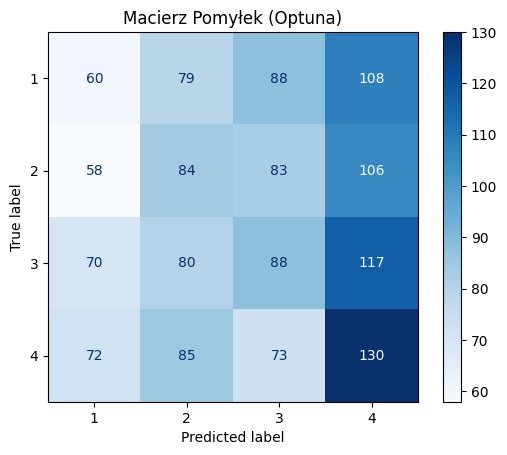

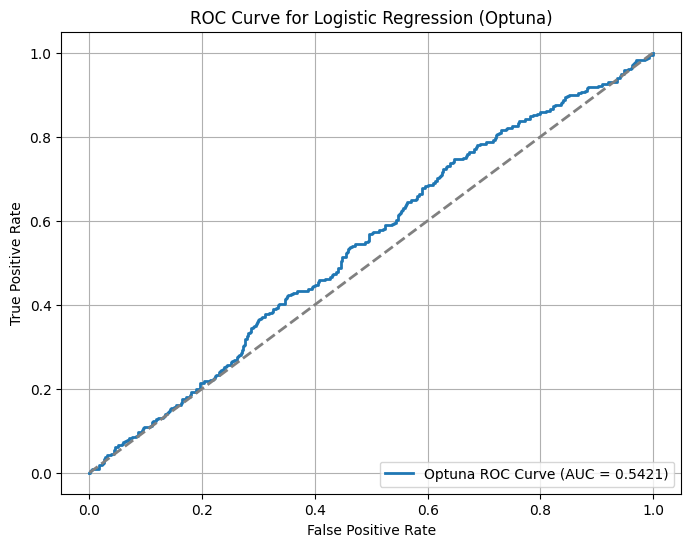


RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2708
Precision: 0.2612
Recall: 0.2708
F1-Score: 0.2584


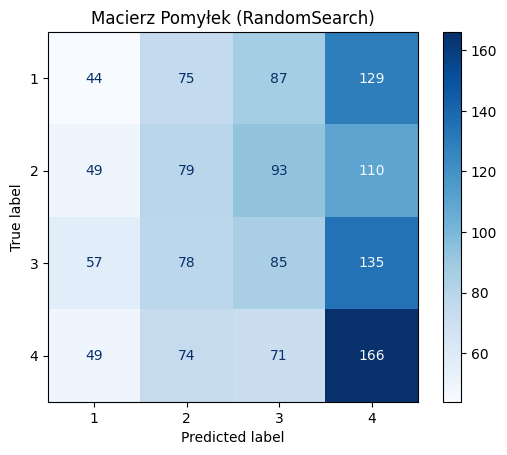

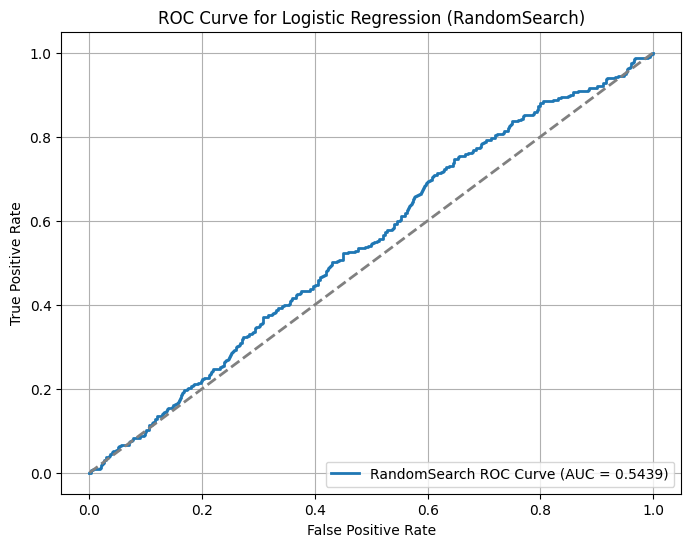

In [37]:
# Ocena obu modeli
models = {'Optuna': model_optuna, 'RandomSearch': model_random}
for name, model in models.items():
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()

    print(f"\n{name} Model (średnie wyniki po 5-foldach):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Macierz pomyłek - wykres
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Macierz Pomyłek ({name})')
    plt.show()

    # Wykres krzywej ROC
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba, pos_label=np.unique(y)[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Logistic Regression ({name})')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

| Metryka         | Optuna      | RandomSearch |
|-----------------|-------------|---------------|
| **Accuracy**    | 0.2621      | 0.2708        |
| **Precision**   | 0.2580      | 0.2612        |
| **Recall**      | 0.2621      | 0.2708        |
| **F1-Score**    | 0.2576      | 0.2584        |

- **Accuracy**: Procent poprawnie sklasyfikowanych próbek.
- **Precision**: Dokładność przewidywań dla każdej klasy.
- **Recall**: Zdolność modelu do poprawnego wykrywania pozytywnych przykładów.
- **F1-Score**: Zrównoważona średnia Precision i Recall.

<!-- Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2621
Precision: 0.2580
Recall: 0.2621
F1-Score: 0.2576

RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2708
Precision: 0.2612
Recall: 0.2708
F1-Score: 0.2584 -->

#### Macierz pomyłek
- Elementy na przekątnej reprezentują liczbę poprawnie sklasyfikowanych próbek.
- Pozostałe wartości wskazują błędnie przypisane próbki między klasami.

- W obu przypadkach widać problemy z klasyfikacją niektórych klas, szczególnie klasy **1** **2** i **3** które sa klasyfikowane jako **4**.

#### Krzywa ROC i AUC
- **AUC** (Area Under Curve) mierzy zdolność modelu do rozróżniania klas.
- Im większe pole pod krzywą, tym lepszy model. Wartość AUC bliska **1** oznacza doskonały klasyfikator, natomiast **0.5** odpowiada losowemu zgadywaniu.

- Model RandomSearch zbliża się do losowego klasyfikatora (AUC ≈ 0.5421).
- Model Optuna zbliża się do losowego klasyfikatora (AUC ≈ 0.5439).
- Jednakze oba modele kiepskosobie radza, nie sa lepsze niz losowe zgadywanie

#### Podsumowanie
- Krzywa ROC, metryki oraz macierz pomylek potwierdza ze Regresja Logistyczna nie nadaje sie do predykcji 4 klasowej.

## Rozdział 2 - GausianNB

In [38]:
# Importy
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [39]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')

In [40]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']

In [41]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [42]:
# Definicja funkcji celu dla Optuny
def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-3)
    model = GaussianNB(var_smoothing=var_smoothing)
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    return np.mean(scores)

In [43]:
# Optymalizacja z użyciem Optuny
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
print("\nNajlepsze parametry Optuny:")
print(best_params_optuna)

# Trenowanie modelu z Optuną
model_optuna = GaussianNB(**best_params_optuna)



[I 2024-12-16 07:35:41,237] A new study created in memory with name: no-name-09f329ba-a2e5-44fc-96d6-2c932949a5db
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2482041038.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-3)
[I 2024-12-16 07:35:41,276] Trial 0 finished with value: 0.25851330498228253 and parameters: {'var_smoothing': 3.0633138923908084e-09}. Best is trial 0 with value: 0.25851330498228253.
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2482041038.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing


Najlepsze parametry Optuny:
{'var_smoothing': 0.0009458406812065634}


In [44]:
# RandomizedSearchCV dla GaussianNB
param_dist = {
    'var_smoothing': np.logspace(-9, -3, 50)
}
random_search = RandomizedSearchCV(
    GaussianNB(), param_distributions=param_dist, n_iter=50, cv=cv, scoring='f1_weighted', random_state=42
)
random_search.fit(X, y)

best_params_random = random_search.best_params_
print("\nNajlepsze parametry RandomSearch:")
print(best_params_random)

# Trenowanie modelu z RandomSearch
model_random = GaussianNB(**best_params_random)


Najlepsze parametry RandomSearch:
{'var_smoothing': np.float64(0.001)}



Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2629
Precision: 0.2599
Recall: 0.2629
F1-Score: 0.2598


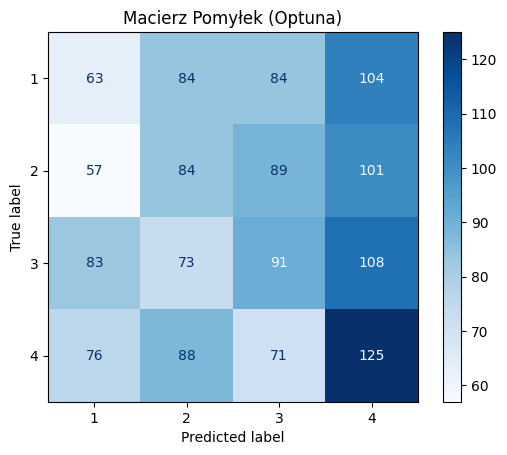

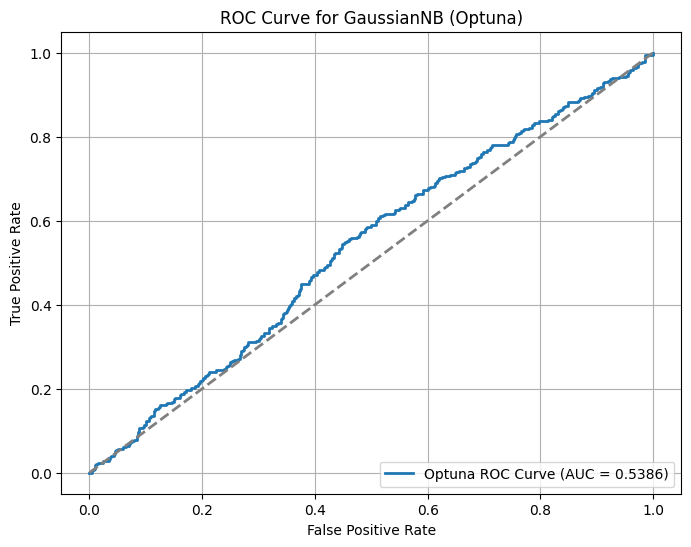


RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2629
Precision: 0.2599
Recall: 0.2629
F1-Score: 0.2598


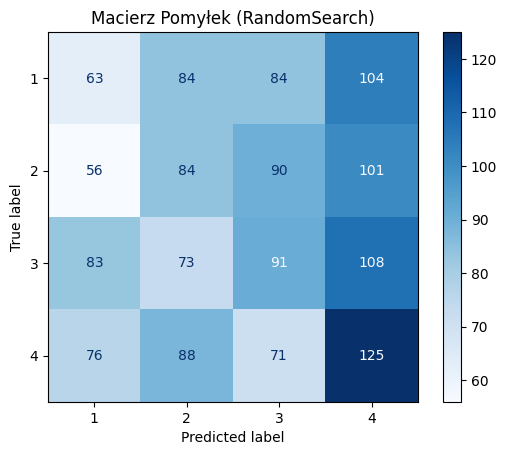

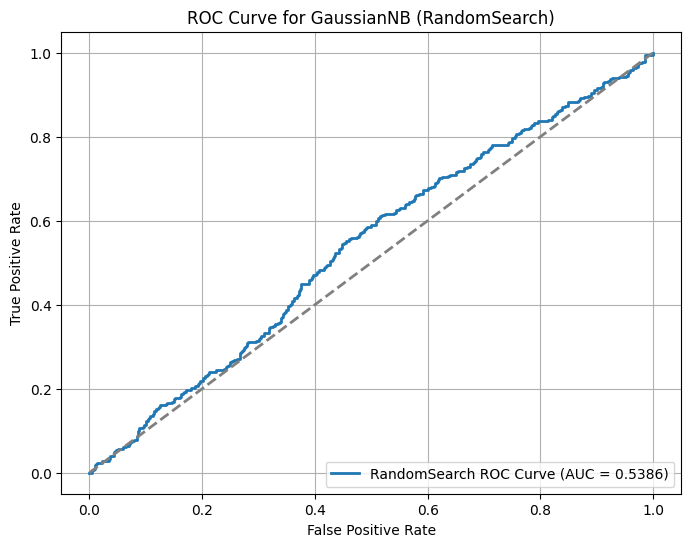

In [45]:
# Ocena obu modeli
models = {'Optuna': model_optuna, 'RandomSearch': model_random}
for name, model in models.items():
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()

    print(f"\n{name} Model (średnie wyniki po 5-foldach):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Macierz pomyłek - wykres
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Macierz Pomyłek ({name})')
    plt.show()

    # Wykres krzywej ROC
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba, pos_label=np.unique(y)[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for GaussianNB ({name})')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [1]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')

In [3]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']

In [4]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# Optuny
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e0)
    model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
    return f1_score(y, y_pred, average='weighted')

In [9]:
# Optymalizacja z użyciem Optuny
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
print("\nNajlepsze parametry Optuny:")
print(best_params_optuna)

[I 2024-12-15 22:53:38,538] A new study created in memory with name: no-name-1f4549da-c8da-413e-b05a-fbf2cfef7aed


/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2151723094.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2151723094.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e0)
[I 2024-12-15 22:53:39,449] Trial 0 finished with value: 0.10786786186921021 and parameters: {'C': 375.1360231671102, 'kernel': 'sigmoid', 'gamma': 0.43228555196195734}. Best is trial 0 with value: 0.10786786186921021.
/var/folders/yt/7ptvhg8x3pj99thz7twr6d340000gn/T/ipykernel_4775/2151723094.py:3: FutureWarning: suggest_log


Najlepsze parametry Optuny:
{'C': 27.44266322607034, 'kernel': 'sigmoid', 'gamma': 0.0010380624843988283}


In [10]:
# Trenowanie modelu z Optuną
model_optuna = SVC(**best_params_optuna, probability=True, random_state=42)
model_optuna.fit(X, y)

SVC(C=27.44266322607034, gamma=0.0010380624843988283, kernel='sigmoid',
    probability=True, random_state=42)

In [5]:
# RandomizedSearchCV dla SVC
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': np.logspace(-4, 0, 10)
}
random_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42), param_distributions=param_dist, n_iter=50, cv=cv, scoring='f1_weighted', random_state=42
)
random_search.fit(X, y)

best_params_random = random_search.best_params_
print("\nNajlepsze parametry RandomSearch:")
print(best_params_random)

# Trenowanie modelu z RandomSearch
model_random = SVC(**best_params_random, probability=True, random_state=42)
model_random.fit(X, y)


Najlepsze parametry RandomSearch:
{'kernel': 'linear', 'gamma': np.float64(0.0002782559402207126), 'C': np.float64(0.021544346900318832)}


SVC(C=np.float64(0.021544346900318832), gamma=np.float64(0.0002782559402207126),
    kernel='linear', probability=True, random_state=42)


Optuna Model:
Accuracy: 0.2686
Precision: 0.2628
Recall: 0.2686
F1-Score: 0.2626


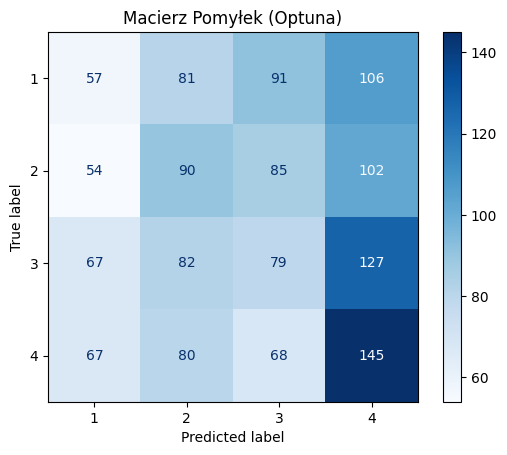

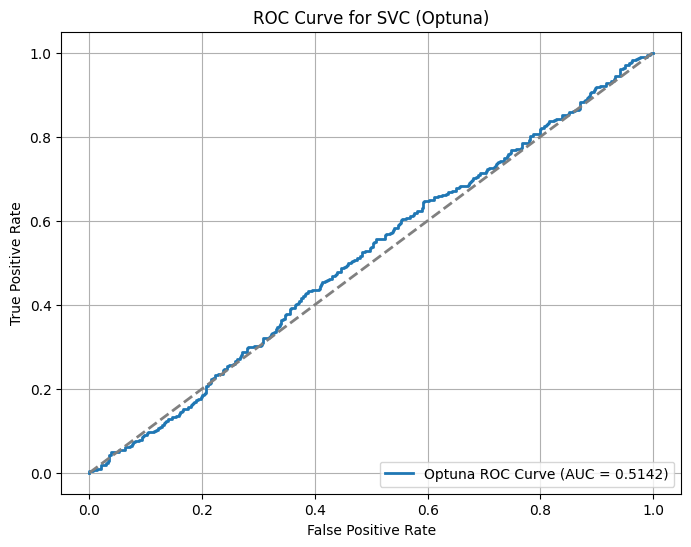


RandomSearch Model:
Accuracy: 0.2701
Precision: 0.2637
Recall: 0.2701
F1-Score: 0.2620


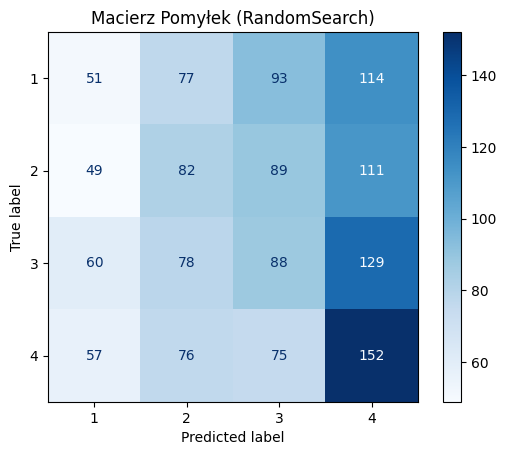

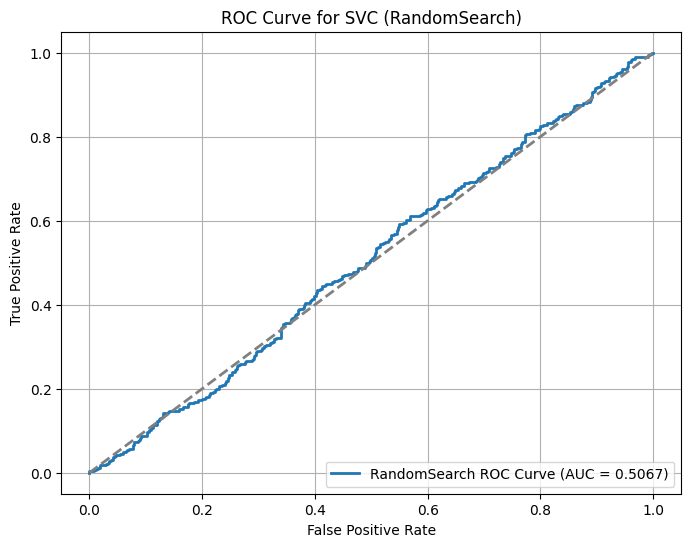

In [11]:
# Ocena obu modeli
models = {'Optuna': model_optuna, 'RandomSearch': model_random}
for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"\n{name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Macierz pomyłek - wykres
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Macierz Pomyłek ({name})')
    plt.show()

    # Wykres krzywej ROC
    fpr, tpr, _ = roc_curve(y, y_proba, pos_label=np.unique(y)[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for SVC ({name})')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

## Rozdział 3 - SVM

## Rozdział 4 - K najbliszych sąsiadów

In [46]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [47]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')

In [48]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']


In [49]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
# Definicja funkcji celu dla Optuny# Definicja funkcji celu dla Optuny
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    return np.mean(scores)

# Optymalizacja z użyciem Optuny
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
print("\nNajlepsze parametry Optuny:")
print(best_params_optuna)

# Trenowanie modelu z Optuną
model_optuna = KNeighborsClassifier(**best_params_optuna)

[I 2024-12-16 07:45:37,254] A new study created in memory with name: no-name-9f82e7b7-3c91-4dc1-9605-71c3de74f9d7
[I 2024-12-16 07:45:37,431] Trial 0 finished with value: 0.2662717069957257 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.2662717069957257.
[I 2024-12-16 07:45:37,471] Trial 1 finished with value: 0.2673131347560364 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.2673131347560364.
[I 2024-12-16 07:45:37,506] Trial 2 finished with value: 0.2582491502234653 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.2673131347560364.
[I 2024-12-16 07:45:37,568] Trial 3 finished with value: 0.2648681080527454 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.2673131347560364.
[I 2024-12-16 07:45:37,605] Trial 4 finished with value: 0.2


Najlepsze parametry Optuny:
{'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean'}


In [51]:
# RandomizedSearchCV dla KNeighborsClassifier
param_dist = {
    'n_neighbors': range(3, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
random_search = RandomizedSearchCV(
    KNeighborsClassifier(), param_distributions=param_dist, n_iter=50, cv=cv, scoring='f1_weighted', random_state=42
)
random_search.fit(X, y)

best_params_random = random_search.best_params_
print("\nNajlepsze parametry RandomSearch:")
print(best_params_random)

# Trenowanie modelu z RandomSearch
model_random = KNeighborsClassifier(**best_params_random)


Najlepsze parametry RandomSearch:
{'weights': 'distance', 'n_neighbors': 10, 'metric': 'minkowski'}



Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2809
Precision: 0.2803
Recall: 0.2809
F1-Score: 0.2787


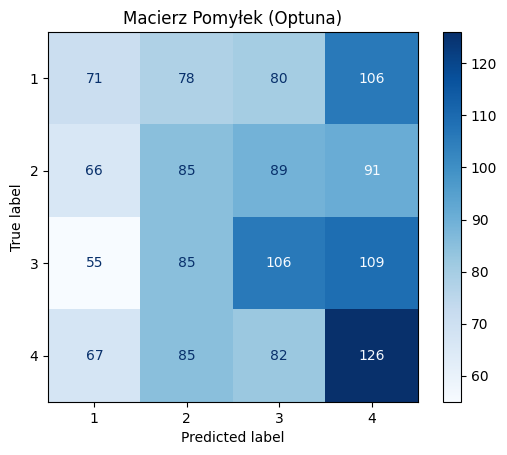

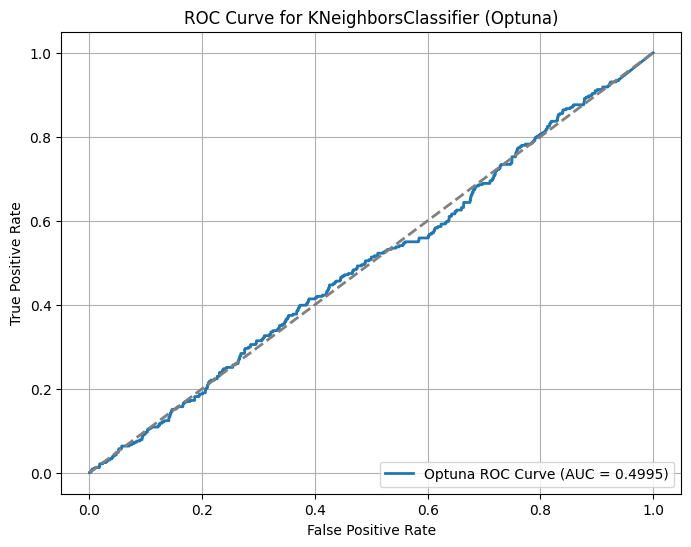


RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2809
Precision: 0.2803
Recall: 0.2809
F1-Score: 0.2787


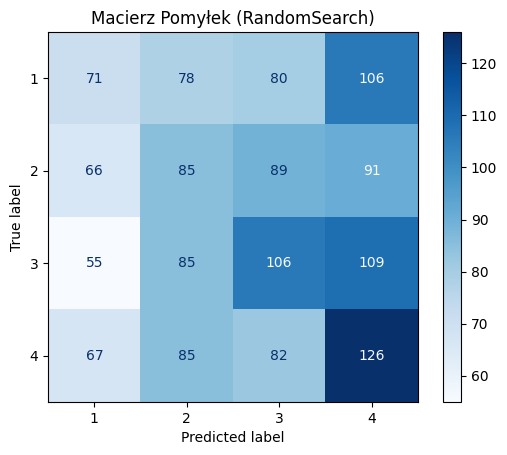

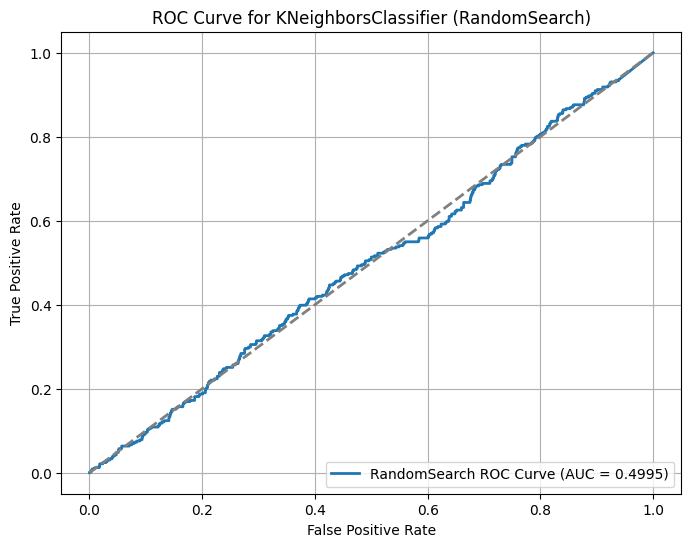

In [52]:
# Ocena obu modeli
models = {'Optuna': model_optuna, 'RandomSearch': model_random}
for name, model in models.items():
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()

    print(f"\n{name} Model (średnie wyniki po 5-foldach):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Macierz pomyłek - wykres
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Macierz Pomyłek ({name})')
    plt.show()

    # Wykres krzywej ROC
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba, pos_label=np.unique(y)[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for KNeighborsClassifier ({name})')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [19]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [20]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')


In [21]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']


In [22]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Rozdział 5 - Drzewo Decyzyjne

In [8]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [9]:
# Wczytanie danych
data = pd.read_csv('cleaned_database.csv')

In [10]:
# Rozdzielenie danych na cechy i zmienną docelową
X = data.drop('Baselinehistological staging', axis=1)
y = data['Baselinehistological staging']

In [11]:
# 5-krotna walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
# Definicja funkcji celu dla Optuny
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    return np.mean(scores)

# Optymalizacja z użyciem Optuny
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
print("\nNajlepsze parametry Optuny:")
print(best_params_optuna)

# Trenowanie modelu z Optuną
model_optuna = DecisionTreeClassifier(**best_params_optuna, random_state=42)

[I 2024-12-16 08:13:17,152] A new study created in memory with name: no-name-339413f5-7961-434e-a383-a354974e85f0
[I 2024-12-16 08:13:17,218] Trial 0 finished with value: 0.22206196379412377 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.22206196379412377.
[I 2024-12-16 08:13:17,311] Trial 1 finished with value: 0.24523381768700156 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.24523381768700156.
[I 2024-12-16 08:13:17,370] Trial 2 finished with value: 0.23850878377734636 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.24523381768700156.
[I 2024-12-16 08:13:17,430] Trial 3 finished with value: 0.2517822032414447 and parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is tria


Najlepsze parametry Optuny:
{'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 9}


In [13]:
# RandomizedSearchCV dla Decision Tree
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 31),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11)
}
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=cv, scoring='f1_weighted', random_state=42
)
random_search.fit(X, y)

best_params_random = random_search.best_params_
print("\nNajlepsze parametry RandomSearch:")
print(best_params_random)

# Trenowanie modelu z RandomSearch
model_random = DecisionTreeClassifier(**best_params_random, random_state=42)


Najlepsze parametry RandomSearch:
{'min_samples_split': 2, 'min_samples_leaf': 9, 'max_depth': 18, 'criterion': 'entropy'}



Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2614
Precision: 0.2630
Recall: 0.2614
F1-Score: 0.2598


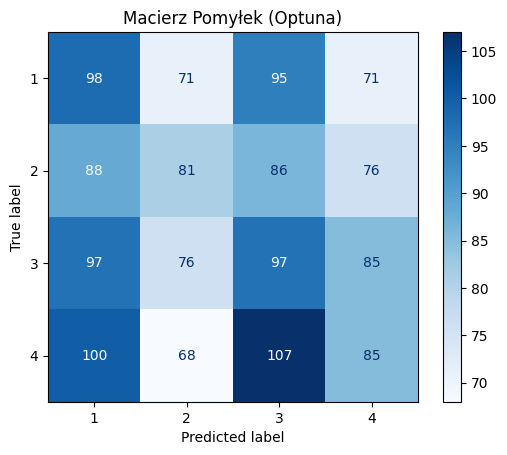

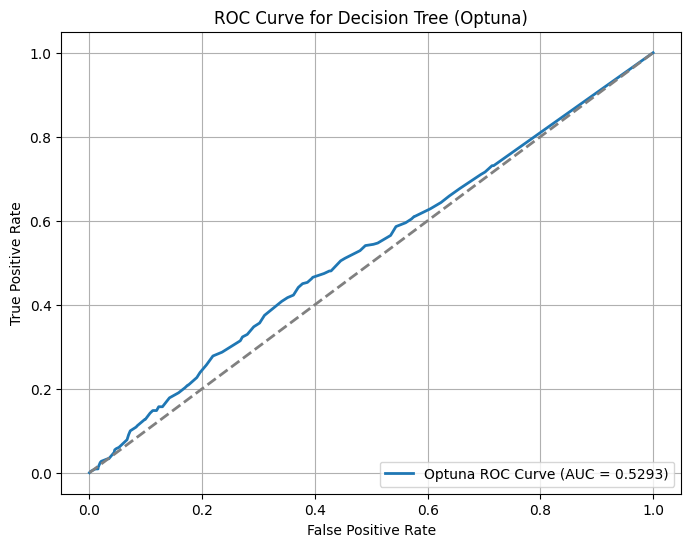


RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2614
Precision: 0.2630
Recall: 0.2614
F1-Score: 0.2598


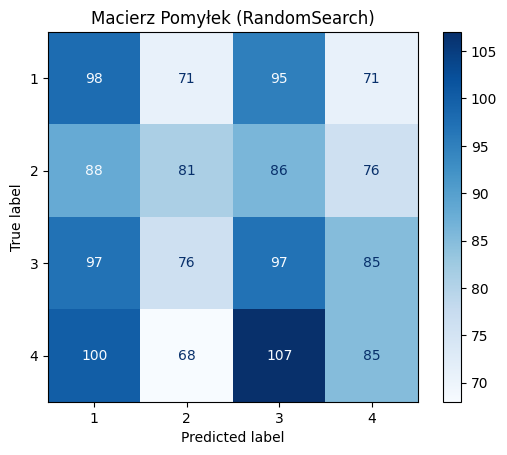

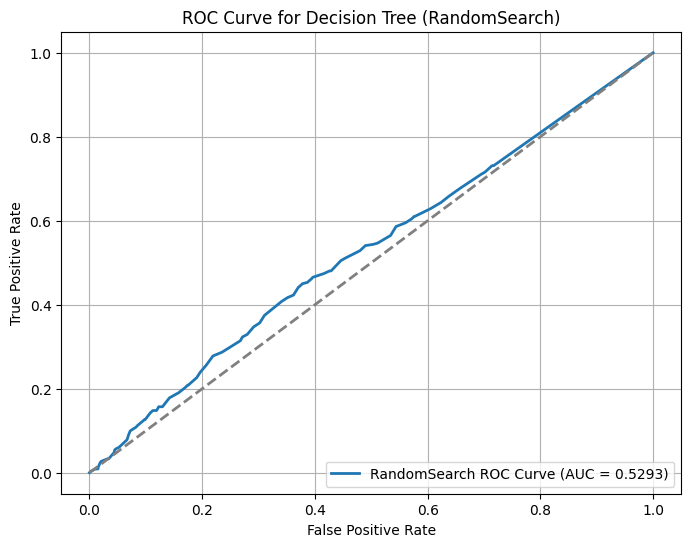

In [14]:
# Ocena obu modeli
models = {'Optuna': model_optuna, 'RandomSearch': model_random}
for name, model in models.items():
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()

    print(f"\n{name} Model (średnie wyniki po 5-foldach):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Macierz pomyłek - wykres
    y_pred = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    cm = confusion_matrix(y, cross_val_predict(model, X, y, cv=cv))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Macierz Pomyłek ({name})')
    plt.show()

    # Wykres krzywej ROC
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba, pos_label=np.unique(y)[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Decision Tree ({name})')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


| Metryka         | Optuna      | RandomSearch |
|-----------------|-------------|---------------|
| **Accuracy**    | 0.2614      | 0.2614        |
| **Precision**   | 0.2630      | 0.2630        |
| **Recall**      | 0.2614      | 0.2614        |
| **F1-Score**    | 0.2598      | 0.2598        |

<!-- RandomSearch Model (średnie wyniki po 5-foldach):
Accuracy: 0.2614
Precision: 0.2630
Recall: 0.2614
F1-Score: 0.2598


Optuna Model (średnie wyniki po 5-foldach):
Accuracy: 0.2614
Precision: 0.2630
Recall: 0.2614
F1-Score: 0.2598 -->

- **Accuracy**: Procent poprawnie sklasyfikowanych próbek.
- **Precision**: Dokładność przewidywań dla każdej klasy.
- **Recall**: Zdolność modelu do poprawnego wykrywania pozytywnych przykładów.
- **F1-Score**: Zrównoważona średnia Precision i Recall.

<!-- AUC = 0.5293 -->

#### Macierz pomyłek
- Wszystkie klasy są **często mylone między sobą**
- Klasa **1** i **3** dominują jako poprawna dla wielu przykładów co nie jest prawdą.

#### Krzywa ROC i AUC
- **(Optuna) AUC = 0.5293**: Krzywa ROC pokazuje bardzo niską zdolność modelu do rozróżniania klas, wynik jest niewiele lepszy niż losowe zgadywanie.
- **(RandomSearch) AUC = 0.5293**: Wynik bardzo podobny do Optuny, co wskazuje na ograniczoną efektywność modelu.

#### Podsumowanie
- Zarówno Optuna, jak i RandomSearch uzyskały bardzo **zbliżone wyniki**.
- Wyniki **AUC ≈ 0.5293** sugerują, że model drzewa decyzyjnego działa **minimalnie lepiej niż losowe zgadywanie**.
- Wszystkie klasy są często mylone, co oznacza, że model nie rozróżnia dobrze między nimi.
- Modele drzewa decyzyjnego działają znacznie szybciej niż algorytmy SVM czy KNN, jednak nie przynoszą znaczącej poprawy wyników.

### Zbalansowanie zbioru danych

Liczba próbek w każdej klasie:
Klasa 1: 335 próbek
Klasa 2: 331 próbek
Klasa 3: 355 próbek
Klasa 4: 360 próbek


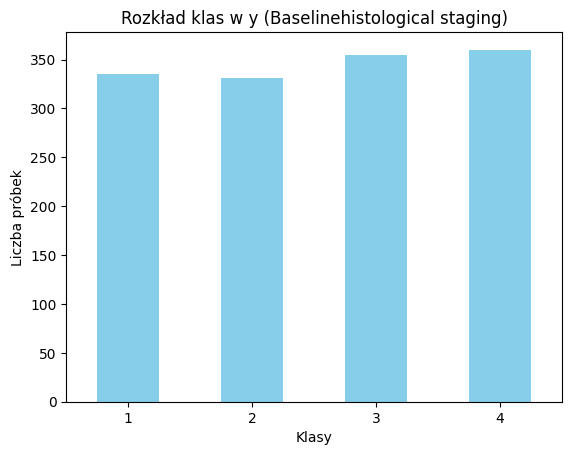

In [27]:
# Policz wystąpienia każdej klasy w y
class_counts = y.value_counts().sort_index()

# Wyświetlenie wyników
print("Liczba próbek w każdej klasie:")
for label, count in class_counts.items():
    print(f"Klasa {label}: {count} próbek")

# Opcjonalnie: wizualizacja rozkładu klas
class_counts.plot(kind='bar', color='skyblue')
plt.title("Rozkład klas w y (Baselinehistological staging)")
plt.xlabel("Klasy")
plt.ylabel("Liczba próbek")
plt.xticks(rotation=0)
plt.show()


- TODO : Podmienic w kazdym algorytmie na usrednione wyniki z cross_val_score
- TODO : Zmienic wszystkkie wykresy zapisane
- TODO : Zmienic nazwe na AUC dla wykresow ROC - nie AOC
- TODO : Dorobic kolejne 5 algortymow